In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import neattext.functions as nfx

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_excel("/home/fariz/Works/Malayalam-Emotion-Detector/github_test/Emotions data.xlsx")

In [4]:
df.head()


,Text,Emotion
0,ബാക്കി പരലോകത്ത് വെച്ച് ചർച്ചചെയ്യാം,Excitement
1,കഴിഞ്ഞില്ല സൈമ ഇത് കഴിഞ്ഞ് ഒരു സുനാമി വരവ് ഇണ്ട്,Excitement
2,തേച്ചത് അവനല്ലേ. പിന്നെ എന്തുവാ ഈ കാണിക്കുന്നേ,Humour
3,ഒരാളെ ജീവിതത്തിലേക്ക് ഒളിഞ്ഞു നോക്കാനുള്ള മലയാ...,Humour
4,പെണ്ണിന് പകരം പബ്ജിയെ സ്നേഹിക്കു മോനെ,Humour


In [5]:
df.isnull().sum()


Text       0
Emotion    0
dtype: int64

In [6]:
empty_cells = df[df.isnull().any(axis=1)]
print(empty_cells)


Empty DataFrame
Columns: [Text, Emotion]
Index: []


In [7]:
df['Emotion'].value_counts()


Emotion
Excitement    1000
Humour        1000
Anger         1000
Sad           1000
Abusive       1000
Love          1000
Fear          1000
Happy         1000
Surprise      1000
Sarcasm       1000
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
df['Text'] = df['Text'].apply(nfx.remove_punctuations)


In [10]:
Xfeatures = df['Text']
ylabels = df['Emotion']

In [11]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3, random_state=42)


In [13]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)

Training time: 6.762789s; Prediction time: 1.577974s


In [14]:
classifier_linear.score(X_test,y_test)


0.24666666666666667

In [15]:
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
Abusive,0.180758,0.223022,0.199678,278.000000
Anger,0.215686,0.224490,0.220000,294.000000
Excitement,0.214854,0.258786,0.234783,313.000000
Fear,0.377510,0.297468,0.332743,316.000000
Happy,0.363036,0.372881,0.367893,295.000000
Humour,0.161049,0.136076,0.147513,316.000000
Love,0.310256,0.436823,0.362819,277.000000
Sad,0.255319,0.251748,0.253521,286.000000
Sarcasm,0.134409,0.081699,0.101626,306.000000
Surprise,0.222222,0.206897,0.214286,319.000000


Text(0.5, 1.0, 'Confusion Matrix')

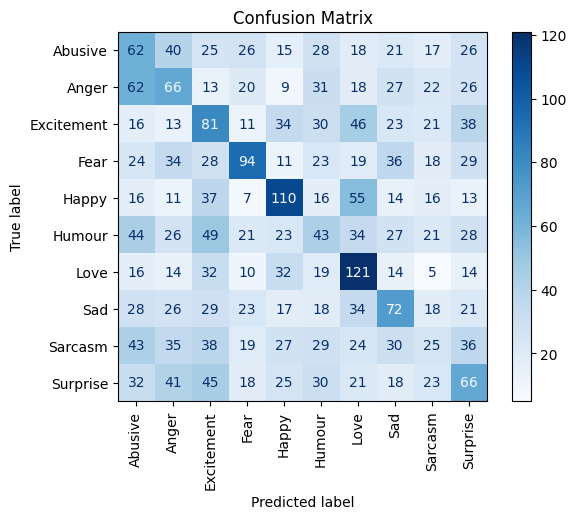

In [16]:
cm = confusion_matrix(y_test, prediction_linear, labels=classifier_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_linear.classes_)

# Plotting the confusion matrix
disp.plot(cmap='Blues', xticks_rotation='vertical')
sns.set(rc={'figure.figsize':(8,6)})
disp.ax_.set_title("Confusion Matrix")

In [17]:
review = ["സ്നേഹം ഒരുപാട് മാറ്റങ്ങൾ കൊണ്ടു വരും"]
myvect = review_vector = cv.transform(review).toarray()
print(classifier_linear.predict(review_vector))

['Love']


In [20]:
import joblib


joblib.dump(classifier_linear, "svm_emotion_model.pkl")
joblib.dump(cv, "count_vectorizer.pkl")

print("Model and Vectorizer Saved Successfully!")

Model and Vectorizer Saved Successfully!
